In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import random
tf.set_random_seed(777)

In [2]:
mnist = input_data.read_data_sets("../data/MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# feature & class dimensions
n_features = 28 * 28
hidden_output_size = 512 # layer output size
n_classes = 10

In [4]:
# input place holders
X = tf.placeholder(tf.float32, [None, n_features])
Y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = 0.7
learning_rate = tf.placeholder(tf.float32, name='learning_rate')
train_mode = tf.placeholder(tf.bool, name='train_mode')

In [5]:
xavier_init = tf.contrib.layers.xavier_initializer()
bn_params = {
    'is_training': train_mode,
    'decay': 0.9,
    'updates_collections': None
}

In [6]:
# We can build short code using 'arg_scope' to avoid duplicate code
# same function with different arguments
with tf.contrib.framework.arg_scope([tf.contrib.layers.fully_connected],
                                    activation_fn=tf.nn.relu,
                                    weights_initializer=xavier_init,
                                    biases_initializer=None,
                                    normalizer_fn=tf.contrib.layers.batch_norm,
                                    normalizer_params=bn_params):
    hidden_layer1 = tf.contrib.layers.fully_connected(X, hidden_output_size, scope='h1')
    h1_drop = tf.contrib.layers.dropout(hidden_layer1, keep_prob, is_training=train_mode)
    
    hidden_layer2 = tf.contrib.layers.fully_connected(h1_drop, hidden_output_size, scope='h2')
    h2_drop = tf.contrib.layers.dropout(hidden_layer2, keep_prob, is_training=train_mode)
    
    hidden_layer3 = tf.contrib.layers.fully_connected(h2_drop, hidden_output_size, scope='h3')
    h3_drop = tf.contrib.layers.dropout(hidden_layer3, keep_prob, is_training=train_mode)
    
    hidden_layer4 = tf.contrib.layers.fully_connected(h3_drop, hidden_output_size, scope='h4')
    h4_drop = tf.contrib.layers.dropout(hidden_layer4, keep_prob, is_training=train_mode)
    
    hypothesis = tf.contrib.layers.fully_connected(h4_drop, n_classes, activation_fn=None, scope='hypothesis')

In [7]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [8]:
# parameters
lr = 0.01 # learning_rate
training_epochs = 15
batch_size = 100

In [9]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [10]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict_train = {X: batch_xs, Y: batch_ys, train_mode: True, learning_rate: lr}
        feed_dict_cost = {X: batch_xs, Y: batch_ys, train_mode: False, learning_rate: lr}
        opt = sess.run(optimizer, feed_dict=feed_dict_train)
        c = sess.run(cost, feed_dict=feed_dict_cost)
        avg_cost += c / total_batch

    print("[Epoch: {:>4}] cost = {:>.9}".format(epoch + 1, avg_cost))
    #print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

[Epoch:    1] cost = 0.379521402
[Epoch:    2] cost = 0.322382897
[Epoch:    3] cost = 0.312713024
[Epoch:    4] cost = 0.305946242
[Epoch:    5] cost = 0.30204906
[Epoch:    6] cost = 0.298805944
[Epoch:    7] cost = 0.297290141
[Epoch:    8] cost = 0.296245888
[Epoch:    9] cost = 0.294301923
[Epoch:   10] cost = 0.292638078
[Epoch:   11] cost = 0.293517785
[Epoch:   12] cost = 0.291447719
[Epoch:   13] cost = 0.291446638
[Epoch:   14] cost = 0.290904016
[Epoch:   15] cost = 0.289642102
Learning Finished!


In [11]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, train_mode: False}))

Accuracy: 0.985


In [12]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], train_mode: False}))

Label:  [8]
Prediction:  [8]


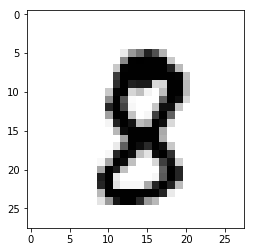

In [13]:
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()